In [2]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

# Plot de quantos controladores são necessários para atingir QoS

In [6]:
tsv6ms = []
tsv9ms = []
tsv15ms = []
tsv21ms = []
    
with open("testes-artigo/6ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=";")
    for line in tsvreader:
        tsv6ms.append(line) 
with open("testes-artigo/9ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=";")
    for line in tsvreader:
        tsv9ms.append(line) 
with open("testes-artigo/15ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=";")
    for line in tsvreader:
        tsv15ms.append(line)
with open("testes-artigo/21ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=";")
    for line in tsvreader:
        tsv21ms.append(line)
   

In [7]:
how_many_controllers = []
topologies = []
for i in range(len(tsv6ms)):
    ## apend the controller data for each ms file
    how_many_controllers.append([int(tsv21ms[i][1]),int(tsv15ms[i][1]),int(tsv9ms[i][1]),int(tsv6ms[i][1])])
    topologies.append(tsv6ms[i][0])
    
len(how_many_controllers) == len(topologies)

True

In [8]:
df=pd.DataFrame(how_many_controllers,topologies,columns=['21ms','15ms','9ms','6ms'])
## DROP EVERY TOPOLOGY THAT NEEDS ONLY 1 CONTROLLER TO REACH 5MS
df = df[df['6ms'] != 1]

print "Temos",len(df['6ms']), "topologias neste plot"


Temos 45 topologias neste plot


<Figure size 1296x360 with 0 Axes>

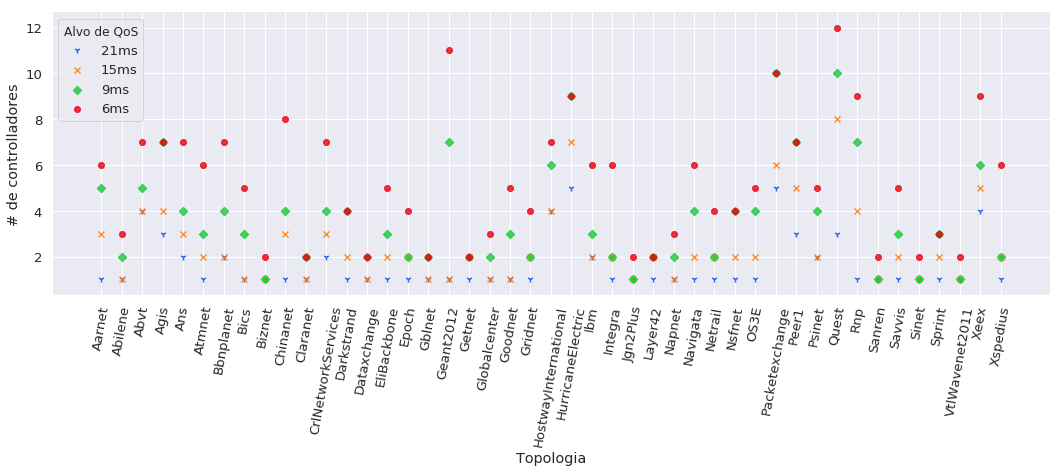

In [13]:

# convert dataframe to categorial cada
df2=df.stack()
df2 = df2.reset_index()
df2.columns = ['Topologia','Alvo de QoS','# de controlladores']
#print(df2)


## plot and save
plt.figure(figsize=(18,5))

sns.set(font_scale=1.2)

#sns.stripplot(data=df2,x='Index',y='Values',hue='Classes', palette="Set2",jitter=0.05,size=5, marker="D")
sns.lmplot( x="Topologia", y="# de controlladores", data=df2,size=5, height=6, aspect=3,
           fit_reg=False, palette="bright", hue='Alvo de QoS', legend=True,legend_out=False, markers=["1", "x", "D", "o"])


plt.xticks(rotation=80)

plt.savefig("scatter.pdf",bbox_inches="tight")

# Meu método vs K-means baseline

In [3]:
tsv6ms = []
tsv9ms = []
tsv15ms = []
tsv21ms = []
    
with open("testes-artigo/6ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=";")
    for line in tsvreader:
        tsv6ms.append(line) 
with open("testes-artigo/9ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=";")
    for line in tsvreader:
        tsv9ms.append(line) 
with open("testes-artigo/15ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=";")
    for line in tsvreader:
        tsv15ms.append(line)
with open("testes-artigo/21ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=";")
    for line in tsvreader:
        tsv21ms.append(line)
   

In [4]:
how_much_delay_QWIP = []
how_much_delay_kmeans = []

topologies = []
for i in range(len(tsv6ms)):
    ## apend the controller data for each ms file
    how_much_delay_QWIP.append([float(tsv21ms[i][2]),float(tsv15ms[i][2]),float(tsv9ms[i][2]),float(tsv6ms[i][2])])
    how_much_delay_kmeans.append([float(tsv21ms[i][3]),float(tsv15ms[i][3]),float(tsv9ms[i][3]),float(tsv6ms[i][3])])
    topologies.append(tsv6ms[i][0])
    
len(how_much_delay_QWIP) == len(topologies)

True

In [46]:
df=pd.DataFrame(how_much_delay_QWIP,topologies,columns=['21ms','15ms','9ms','6ms'])
df2=pd.DataFrame(how_much_delay_kmeans,topologies,columns=['21ms','15ms','9ms','6ms'])

## DROP EVERY TOPOLOGY THAT NEEDS ONLY 1 CONTROLLER TO REACH 5MS
#df = df[df['6ms'] != 1]
#df2 = df2[df2['6ms'] != 1]


print "Temos",len(df['6ms']), "topologias neste plot"


Temos 77 topologias neste plot


In [47]:
df['6ms']

Aarnet                5.32
Abilene               6.00
Abvt                  5.73
Aconet                2.56
Agis                  5.63
Amres                 1.35
Ans                   5.47
Arn                   4.41
Atmnet                4.36
Basnet                1.64
Bbnplanet             5.34
Bics                  5.97
Biznet                2.76
Cesnet2001            1.54
Cesnet201006          1.50
Chinanet              5.49
Claranet              5.31
CrlNetworkServices    5.11
Cynet                 0.32
Darkstrand            5.78
Dataxchange           4.78
EliBackbone           5.64
Epoch                 4.29
Evolink               2.49
Forthnet              2.76
Gblnet                3.44
Geant2012             5.92
Getnet                5.84
Globalcenter          5.71
Goodnet               5.82
                      ... 
Napnet                5.71
Navigata              3.83
Netrail               4.36
NetworkUsa            4.40
Niif                  1.49
Noel                  2.04
N

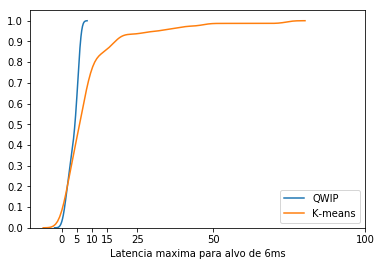

In [76]:
sns.kdeplot(df['6ms'],cumulative=True, label='QWIP')
sns.kdeplot(df2['6ms'],cumulative=True, label='K-means')

plt.xticks([0, 5, 10, 15,25,50,100])
plt.yticks([0.0, 0.1, 0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0])

plt.xlabel('Latencia maxima para alvo de 6ms')

plt.legend();
plt.savefig("cdf6.pdf")

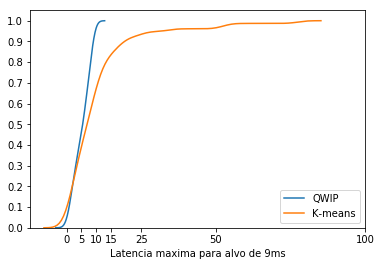

In [73]:
sns.kdeplot(df['9ms'],cumulative=True, label='QWIP')
sns.kdeplot(df2['9ms'],cumulative=True, label='K-means')

plt.xticks([0, 5, 10, 15,25,50,100])
plt.yticks([0.0, 0.1, 0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0])

plt.xlabel('Latencia maxima para alvo de 9ms')

plt.legend();
plt.savefig("cdf9.pdf")

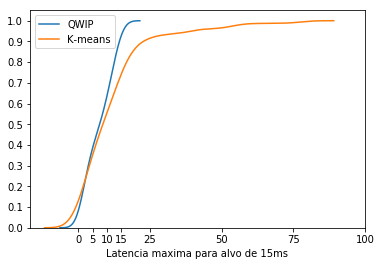

In [74]:
sns.kdeplot(df['15ms'],cumulative=True, label='QWIP')
sns.kdeplot(df2['15ms'],cumulative=True, label='K-means')

plt.xticks([0, 5, 10, 15,25,50,75,100])
plt.yticks([0.0, 0.1, 0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel('Latencia maxima para alvo de 15ms')

plt.savefig("cdf15.pdf")

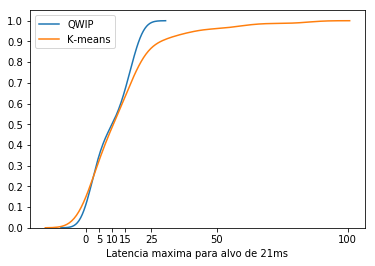

In [75]:
sns.kdeplot(df['21ms'],cumulative=True, label='QWIP')
sns.kdeplot(df2['21ms'],cumulative=True, label='K-means')

plt.xticks([0, 5, 10, 15,25,50,100])
plt.yticks([0.0, 0.1, 0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel('Latencia maxima para alvo de 21ms')


plt.savefig("cdf21.pdf")

#  Gerar CDF para topologias os3e, rnp e chinanet

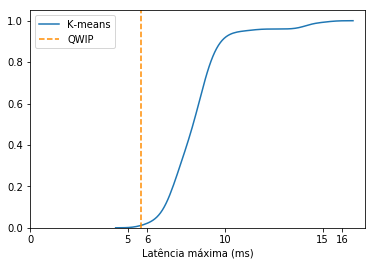

In [353]:
#os3e

## esses valores foram conseguidos printando 100 iterações do k-means
basekmeans = [9.27,8.8,9.27,10.11,8.8,7.23,8.26,8.87,8.8,7.92,8.78,9.68,15.25,8.8,8.22,8.8,7.23,7.08,7.47,8.61,7.47,7.92,8.78,7.64,7.23,5.7,8.61,7.92,7.64,7.22,7.23,8.22,8.22,8.87,7.47,6.26,7.47,14.12,9.68,9.68,8.07,8.61,8.07,7.47,8.07,8.07,8.61,8.61,8.26,7.08,5.7,7.47,9.27,9.68,6.49,8.22,8.8,8.87,8.8,7.08,7.08,8.61,8.8,9.27,7.47,8.61,14.12,7.64,6.68,8.22,7.64,8.8,9.27,7.47,8.8,6.68,7.92,8.61,9.27,8.61,8.61,11.39,9.27,9.27,10.4,7.92,7.23,8.8,9.27,7.08,8.61,7.47,8.87,9.68,9.08,7.64,6.68,7.05,9.27,14.12]

sns.kdeplot(basekmeans,cumulative=True, label='K-means')

plt.axvline(5.7, 0,1.0,linestyle='--',color='darkorange',label='QWIP')

plt.xticks([0, 5, 6, 10, 15,16])
plt.xlabel("Latência máxima (ms)") #para topologia OS3E com 5 controladores
plt.legend()

plt.savefig("cdfOS3E.pdf")

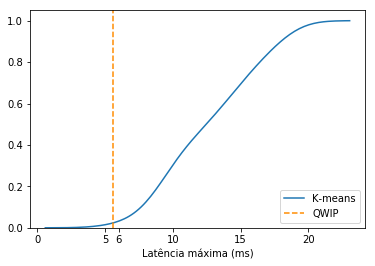

In [354]:
#rnp
## deu ruim, vamos pular esse por enquanto

## esses valores foram conseguidos printando 100 iterações do k-means
#basekmeans = [18.06,9.67,14.34,15.24,12.79,18.06,18.06,18.06,16.93,12.79,15.69,8.96,5.59,5.59,14.01,12.79,18.06,18.06,5.59,17.16,12.79,9.67,17.16,18.06,9.67,15.61,8.61,9.67,7.94,15.61,15.24,18.06,9.67,9.67,15.61,5.59,8.96,15.24,9.67,13.63,15.61,8.61,9.67,9.67,15.24,9.67,14.34,8.96,9.68,15.61,15.61,16.93,14.53,9.67,12.79,14.34,10.13,12.79,12.79,8.96,9.67,15.61,8.96,12.79,9.67,9.67,8.96,18.06,8.61,14.34,15.61,15.24,13.63,8.61,14.34,5.59,18.06,8.61,9.67,9.67,15.61,9.67,13.63,17.16,7.94,12.79,18.06,18.06,15.61,12.79,12.79,18.06,9.67,9.67,18.06,9.68,9.67,15.24,12.08,14.03,12.79,8.96,9.67,12.79,13.63,18.06,15.61,18.06,15.24,13.63,5.59,7.94,8.96,18.06,15.24,9.67,16.22,9.67,9.67,18.06,9.67,8.96,9.68,9.67,18.06,12.79,9.67,14.53,18.06,8.61,9.67,9.67,6.6,12.08,9.67,9.68,9.67,18.06,13.02,9.67,7.94,18.06,9.67,18.06,18.06,15.61,9.67,18.06,15.69,15.61,8.61,18.06,15.61,15.61,9.67,9.67,9.67,12.79,16.93,9.67,18.06,19.22,14.53,18.06,9.67,15.24,9.67,9.67,15.61,15.61,15.61,9.67,9.67,14.53,13.02,16.4,18.06,9.67,18.06,8.96,18.06,18.06,18.06,15.61,9.67,18.06,15.61,17.16,8.96,9.67,15.61,8.61,8.96,14.34,5.59,9.67,18.06,9.67,14.53,18.06,18.06,18.06,9.67,9.67,9.67,15.61,15.61,16.22,7.94,15.24,9.68,15.24,18.06,9.67,14.03,15.61,5.59,15.61,14.03,5.59,15.61,8.96,18.06,18.06,15.24,15.61,12.08,8.96,9.67,9.67,13.63,9.67,19.75,13.63,15.61,14.53,9.67,9.68,15.69,15.24,8.96,8.96,15.61,12.79,12.79,14.34,12.79,8.96,15.61,15.61,7.94,9.67,9.67,14.34,9.67,14.03,7.94,14.03,15.61,16.93,8.96,14.53]
basekmeans = [12.79,8.96,9.67,15.61,8.96,12.79,9.67,9.67,8.96,18.06,8.61,14.34,15.61,15.24,13.63,8.61,14.34,5.59,18.06,8.61,9.67,9.67,15.61,9.67,13.63,17.16,7.94,12.79,18.06,18.06,15.61,12.79,12.79,18.06,9.67,9.67,18.06,9.68,9.67,15.24,12.08,14.03,12.79,8.96,9.67,12.79,13.63,18.06,15.61,18.06,15.24,13.63,5.59,7.94,8.96,18.06,15.24,9.67,16.22,9.67,9.67,18.06,9.67]
#sns.kdeplot(basekmeans,cumulative=True, label='K-means',kernel="biw")
sns.distplot(basekmeans, hist=False, kde=True, label='K-means',kde_kws={'cumulative': True})

plt.axvline(5.59, 0,1.0,linestyle='--',color='darkorange',label='QWIP')

plt.xticks([0, 5, 6, 10, 15,20])
plt.xlabel("Latência máxima (ms)") #para topologia rnp para 9 controladores
## o QWIP conseguiu 5.59
plt.legend()

plt.savefig("cdfRnp.pdf")

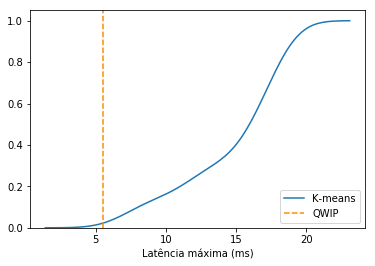

In [355]:
#Chinanet

## esses valores foram conseguidos printando 100 iterações do k-means
basekmeans = [15.98,17.94,17.94,15.98,17.94,15.98,17.94,15.98,17.45,17.45,17.94,15.98,17.94,17.94,7.42,17.94,17.94,9.0,17.94,15.98,15.98,17.94,7.42,11.75,11.75,17.94,17.45,7.42,17.94,15.98,15.98,11.75,15.98,15.98,11.75,15.98,15.98,6.19,15.98,7.42,11.75,6.19,15.98,15.98,17.94,17.94,11.75,7.42,6.63,15.98,15.98,17.94,18.31,7.42,11.75,17.45,6.63,15.98,17.94,17.94,17.94,17.94,11.51,14.36,15.98,17.94,17.94,17.94,15.98,7.42,17.94,17.94,11.75,17.94,15.98,17.94,8.36,15.98,15.98,11.75,11.75,7.42,17.45,11.75,17.94,15.98,17.94,17.45,11.75,7.42,17.94,17.45,15.98,17.45,11.75,11.75,17.94,17.94,11.75,15.98]

sns.kdeplot(basekmeans,cumulative=True, label='K-means')
plt.axvline(5.49, 0,1.0,linestyle='--',color='darkorange',label='QWIP')

#plt.xticks([0, 5, 6, 10, 15,20])
plt.xlabel("Latência máxima (ms)") #para topologia OS3E com 8 controladores
## o QWIP conseguiu 5.49
plt.legend()

plt.savefig("cdfChinanet.pdf")

# Velocidade de execução


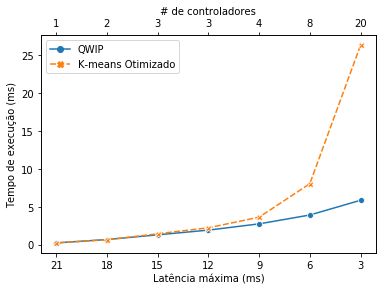

In [350]:
#chinanet


QWIP = [0.2151291847,0.6610153675,1.282151437,1.904282856,2.731206274,3.902425265,5.84907465]
KmeansOtimizado = [0.2132348776,0.6288815498,1.420441246,2.210192084,3.613167429,8.034110451,26.34121072]
d = []
for i in range(len(QWIP)):
    d.append([QWIP[i],KmeansOtimizado[i]])

fig, ax = plt.subplots()

df=pd.DataFrame(d,[21,18,15,12,9,6,3],['QWIP','K-means Otimizado'])
plt.xticks([21,18,15,12,9,6,3])

sns.lineplot(data=df, markers=True,err_style ="bars", ax=ax)
plt.gca().invert_xaxis()

ax2 = ax.twiny()
ax2.set(xticks=ax.get_xticks(), xticklabels=[1,2,3,3,4,8,20], xlim=ax.get_xlim())

ax2.set_xlabel(r"# de controladores")
ax.set_xlabel(r"Latência máxima (ms)")
ax.set_ylabel(r"Tempo de execução (ms)")

plt.savefig("tempoChinanet.pdf")



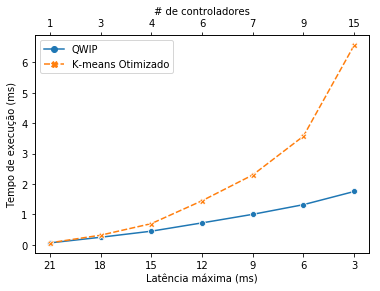

In [351]:
#RNP

QWIP = [0.06268455982,0.2484064341,0.4483849287,0.7212188244,1.002997565,1.320814657,1.754439664]
KmeansOtimizado = [0.06565725803,0.316223979,0.6963923931,1.448416495,2.297613025,3.573920274,6.565049863]
d = []
for i in range(len(QWIP)):
    d.append([QWIP[i],KmeansOtimizado[i]])
    
df=pd.DataFrame(d,[21,18,15,12,9,6,3],['QWIP','K-means Otimizado'])

fig, ax = plt.subplots()

sns.lineplot(data=df,  markers=True,err_style ="bars",ax=ax)
plt.xticks([21,18,15,12,9,6,3])
plt.gca().invert_xaxis()


ax2 = ax.twiny()
ax2.set(xticks=ax.get_xticks(), xticklabels=[1,3,4,6,7,9,15], xlim=ax.get_xlim())

ax2.set_xlabel(r"# de controladores")
ax.set_xlabel(r"Latência máxima (ms)")
ax.set_ylabel(r"Tempo de execução (ms)")

plt.savefig("tempoRnp.pdf")

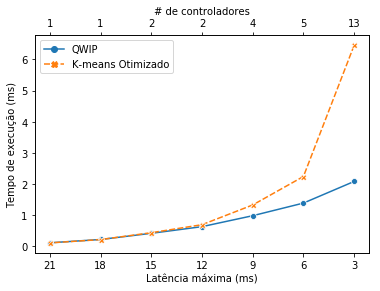

In [352]:
#OS3E

QWIP = [0.1088396788,0.2153842449,0.413281846,0.6274722815,0.9792152405,1.384762192,2.080439782]
KmeansOtimizado = [0.1050370216,0.2121828318,0.4326788425,0.6902249575,1.324193406,2.238712883,6.455526185]
d = []
for i in range(len(QWIP)):
    d.append([QWIP[i],KmeansOtimizado[i]])
    
df=pd.DataFrame(d,[21,18,15,12,9,6,3],['QWIP','K-means Otimizado'])

fig, ax = plt.subplots()

sns.lineplot(data=df, markers=True,ax=ax)
plt.xticks([21,18,15,12,9,6,3])
plt.gca().invert_xaxis()

ax2 = ax.twiny()
ax2.set(xticks=ax.get_xticks(), xticklabels=[1,1,2,2,4,5,13], xlim=ax.get_xlim())
ax2.set_xlabel(r"# de controladores")

ax.set_xlabel(r"Latência máxima (ms)")
ax.set_ylabel(r"Tempo de execução (ms)")

plt.savefig("tempoOs3e.pdf")



In [16]:
ex_tsv = []

    
with open("testes-artigo/execucao-media-10runs-meu-vs-wang-para-6ms") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter=str(";"))
    for line in tsvreader:
        ex_tsv.append(line) 
   

In [18]:
how_much_runtime_QWIP = []
how_much_runtime_kmeans = []
topologies = []

for i in range(len(ex_tsv)):
    ## apend the controller data for each ms file
    how_much_runtime_QWIP.append([float(ex_tsv[i][2])])
    how_much_runtime_kmeans.append([float(ex_tsv[i][3])])
    topologies.append(ex_tsv[i][0])
    
len(how_much_runtime_QWIP) == len(topologies)

True

In [23]:
df=pd.DataFrame(how_much_runtime_QWIP,topologies,columns=['runtime'])
df2=pd.DataFrame(how_much_runtime_kmeans,topologies,columns=['runtime'])

## DROP EVERY TOPOLOGY THAT NEEDS ONLY 1 CONTROLLER TO REACH 5MS
#df = df[df['6ms'] != 1]
#df2 = df2[df2['6ms'] != 1]


print "Temos",len(df['runtime']), "topologias neste plot"


 Temos 77 topologias neste plot


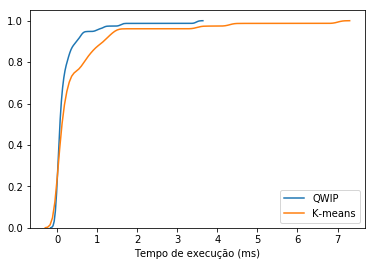

In [30]:
sns.kdeplot(df['runtime'],cumulative=True, label='QWIP')
sns.kdeplot(df2['runtime'],cumulative=True, label='K-means')

#plt.xticks([0, 5, 10, 15,25,50,100])
#plt.yticks([0.0, 0.1, 0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1.0])

plt.xlabel('Tempo de execução (ms)')

plt.legend();
#plt.savefig("cdfRuntime6.pdf")